In [365]:
import numpy as np
import matplotlib.pyplot as plt

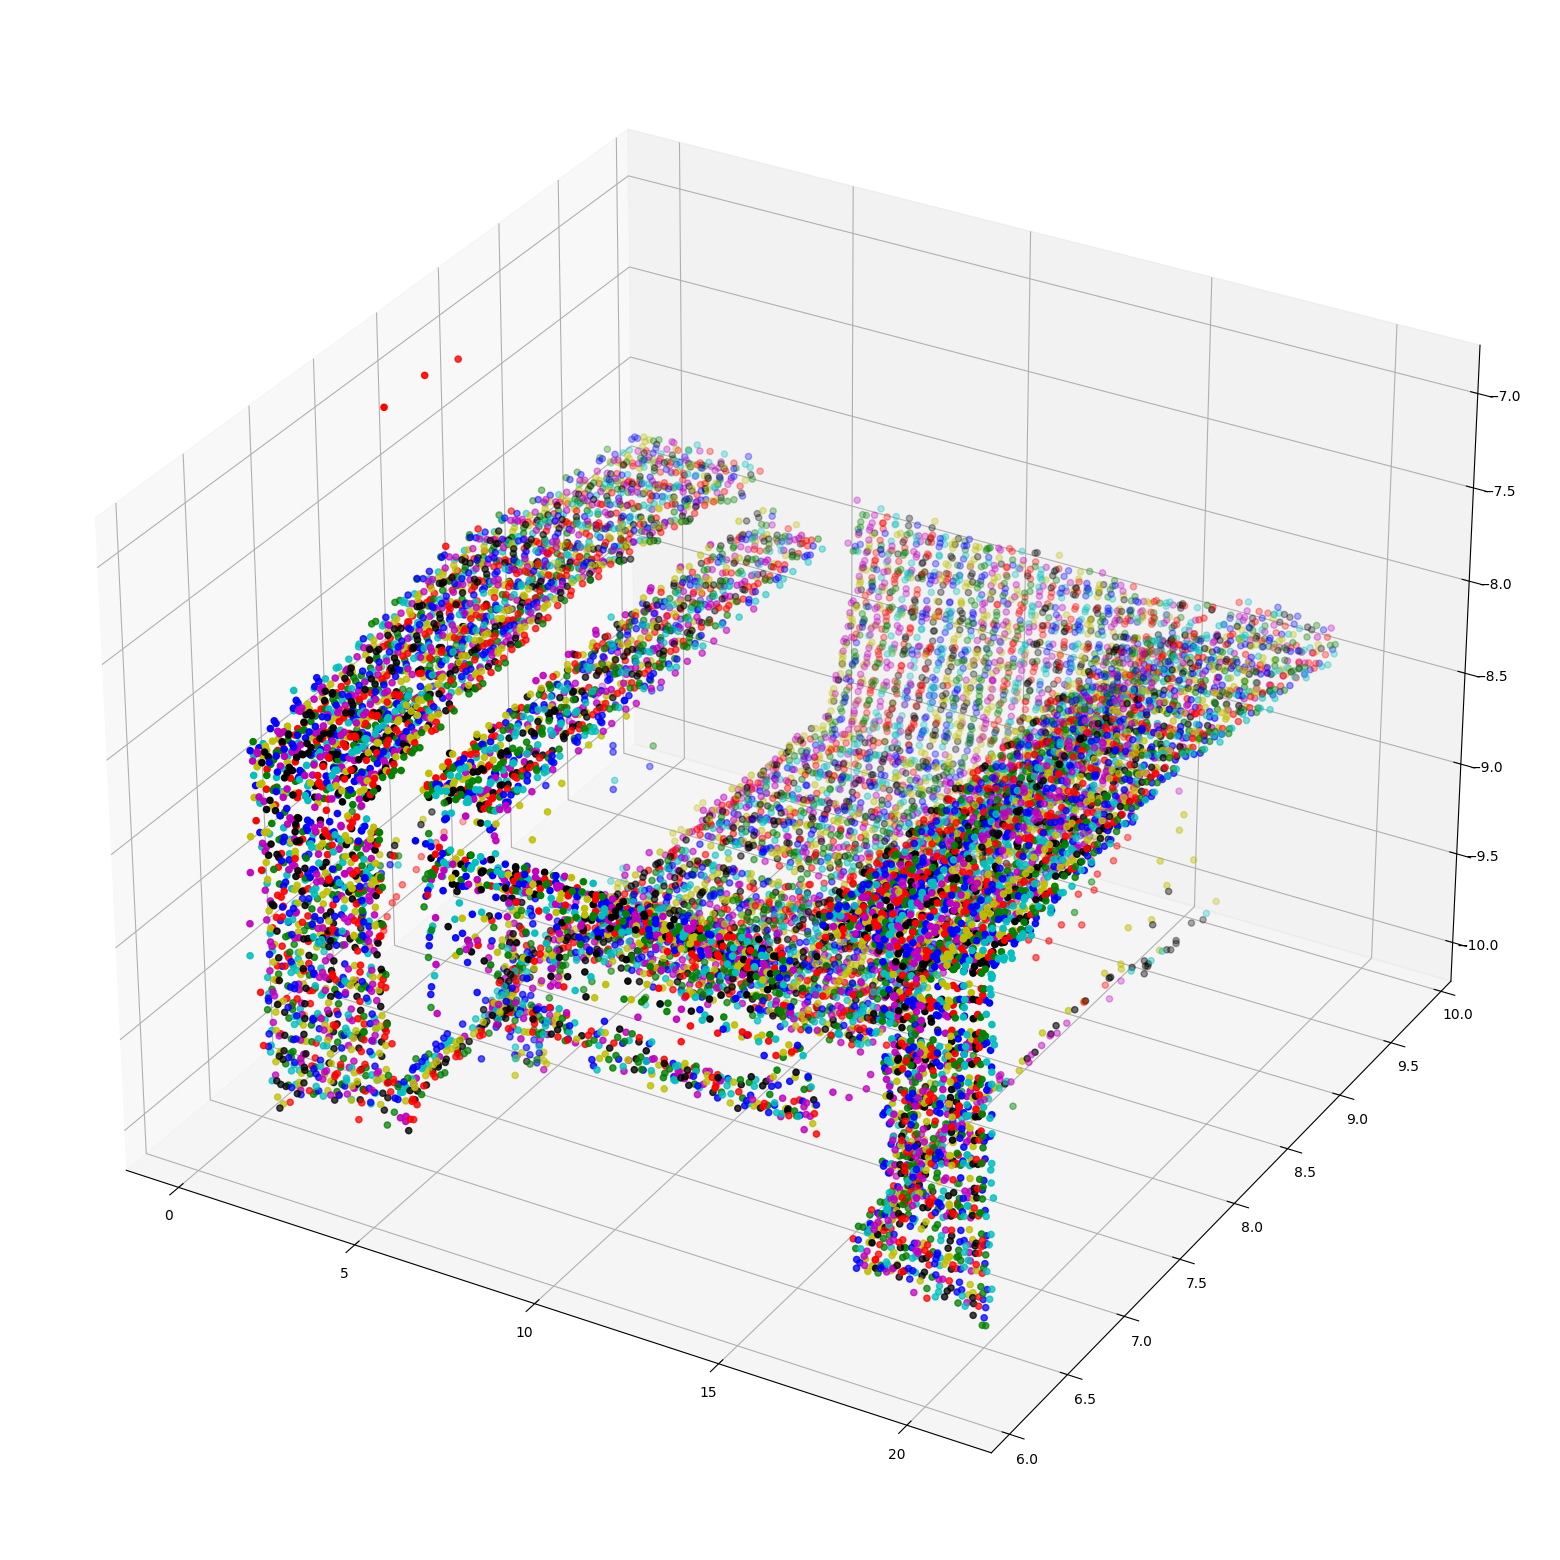

In [352]:
data = np.loadtxt('/Users/sofiakanukova/Downloads/Telegram Lite/motor.txt', dtype=([('x', float), ('y', float), ('z', float), ('ref', float)]))

const_range = 0.1
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

low_layer = - 10

data['x'] = data['x'] - data['x'][0]
data = data[data['z'] > low_layer]

separated_data = []

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] 
for i in range(int((data['x'][-1]) / const_range)):
    curr_data = data[(const_range * i < data['x']) & (data['x'] < const_range * (i + 1))]
    separated_data.append(curr_data)
    ax.scatter(curr_data['x'], curr_data['y'], curr_data['z'], c=colors[i % len(colors)])

plt.show()

In [353]:
sampleX_min = float(sample['x'].min())
sampleX_max = float(sample['x'].max())
sampleY_min = float(sample['y'].min())
sampleY_max = float(sample['y'].max())
sampleZ_min = float(sample['z'].min())
sampleZ_max = float(sample['z'].max())

mask_maxz = data['z'] == sampleZ_max
sampleZmax_X = float(data[mask_maxz]['x'][0])
sampleZmax_Y = float(data[mask_maxz]['y'][0])

Left_Point = [sampleX_min, sampleY_min, sampleZ_min]
Right_Point = [sampleX_min, sampleY_max, sampleZ_min]
Top_Point = [sampleZmax_X, sampleZmax_Y, sampleZ_max]

delt = 0.2

In [354]:
def line_equation(point1, point2):
    z1 = point1[2]
    z2 = point2[2]
    y1 = point1[1]
    y2 = point2[1]
    a = (z2 - z1) / (y2 - y1)
    b = z1 - a * y1
    return a, b

al, bl = line_equation(Left_Point, Top_Point)
ar, br = line_equation(Top_Point, Right_Point)

bl_bottom, bl_top = bl - delt, bl + delt
br_bottom, br_top = br - delt, br + delt


In [355]:
lineLeftBottom = [al, bl_bottom]
lineLeftTop = [al, bl_top]
lineRightBottom = [ar, br_bottom]
lineRightTop = [ar, br_top]

In [356]:
def filter_points(points, lineLT, lineRT, lineLB, lineRB):

    x, y, z = points['x'], points['y'], points['z']

    lineLT_z = lineLT[0] * y + lineLT[1]
    lineRT_z = lineRT[0] * y + lineRT[1]
    lineLB_z = lineLB[0] * y + lineLB[1]
    lineRB_z = lineRB[0] * y + lineRB[1]

    mask1 = ((z <= lineLT_z) & (y <= sampleZmax_Y)) | ((z <= lineRT_z) & (y >= sampleZmax_Y))
    mask2 = ((z >= lineLB_z) & (y <= sampleZmax_Y)) | ((z >= lineRB_z) & (y >= sampleZmax_Y))

    mask = mask1 & mask2

    filtered_points = points[mask]

    return len(filtered_points)/len(points)

In [357]:
x_array = []
coeff_array = []
for i in range(1, len(separated_data)):
    if len(separated_data[i]['x']) > 0:
        x_array.append(float(separated_data[i]['x'][-1]))
        coeff_array.append(filter_points(separated_data[i], lineLeftTop, lineRightTop, lineLeftBottom, lineRightBottom))
    else:
        continue

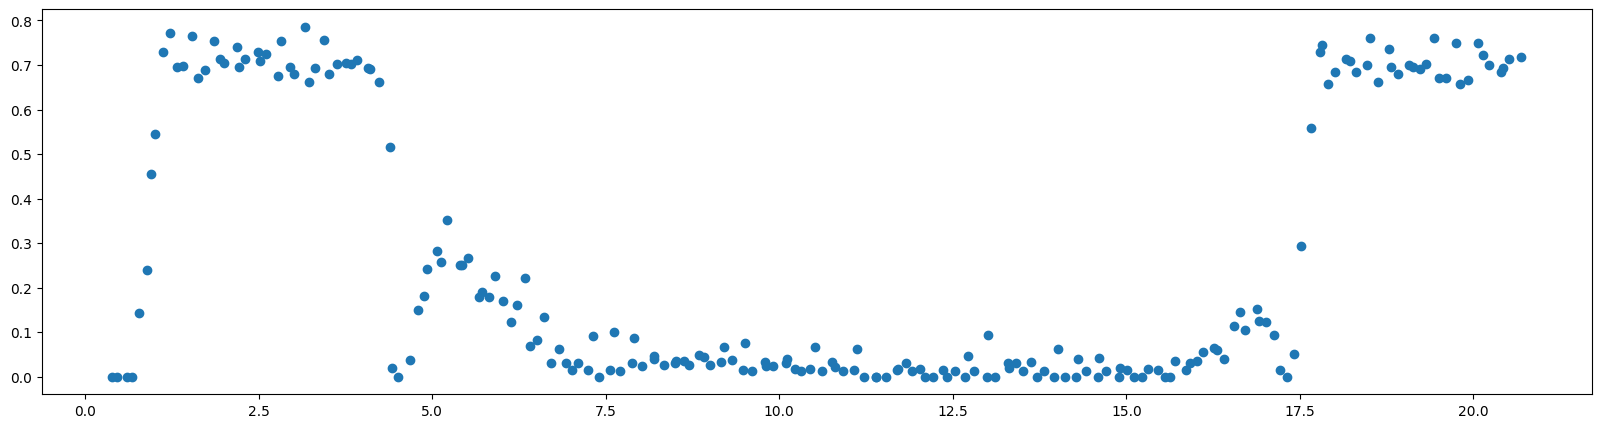

In [364]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.scatter(x_array, coeff_array)
plt.show()

In [54]:
from numpy import dtype, loadtxt, float64, arange, savetxt
from numpy.typing import NDArray

dt: dtype = dtype([('x', float), ('y', float), ('z', float), ('ref', float)])
wagon: NDArray = loadtxt('/Users/sofiakanukova/Downloads/Telegram Lite/motor.txt', dtype=dt)

WINDOW_SIZE_IN_METERS: int = 0.1
start: float64 = wagon['x'].min()
end: float64 = wagon['x'].max()

number: int = 0
for x_step in arange(start, end, step=WINDOW_SIZE_IN_METERS):
    section: NDArray = wagon[
        (wagon['x'] >= x_step) &
        (wagon['x'] < x_step + WINDOW_SIZE_IN_METERS)
    ]
    savetxt(f'{number}.txt', section, fmt='%.5f')
    number += 1
